In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [11]:
#Leemos el df

df = pd.read_csv(r'encuesta.csv', delimiter=r'\s+', engine='python', on_bad_lines='skip')
print(df.shape)
df.head()

(30007, 172)


,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,None
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,None
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,None
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [12]:
#Separacion de datos en distintos DFs para poder trabajar con ellos

preguntas = df.iloc[:, :126]    #Cuestionario del DASS

tipi = df.iloc[:, 131:141]      #10-items personality inventory

lapse = df.iloc[:, 126:131]     #columna de tiempo que se tarda en responder la encuesta

vlc = df.iloc[:, 141:157]       #palabras para evaluación cognitiva, dentro de contexto educativo y de atención al cuestionario

demograficos = df.iloc[:, 157:] #datos demográficos

In [13]:
listaA = []
for n in range(1, 43):
    numero = f'Q{n}I'
    listaA.append(numero)
QA = preguntas.drop(listaA, axis=1)

listaI = []
for n in range(1, 43):
    numero = f'Q{n}A'
    listaI.append(numero)
QE = QA.drop(listaI, axis=1)

listaE = []
for n in range(1, 43):
    numero = f'Q{n}E'
    listaE.append(numero)
QA=QA.drop(listaE,axis=1)

In [14]:
def separarQA(lista,df):
    lista_vacia=[]

    for n in lista:
        numero = f'Q{n}A'
        lista_vacia.append(numero)
        nuevo_QA=df[lista_vacia]

    return nuevo_QA

In [15]:
QA.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3


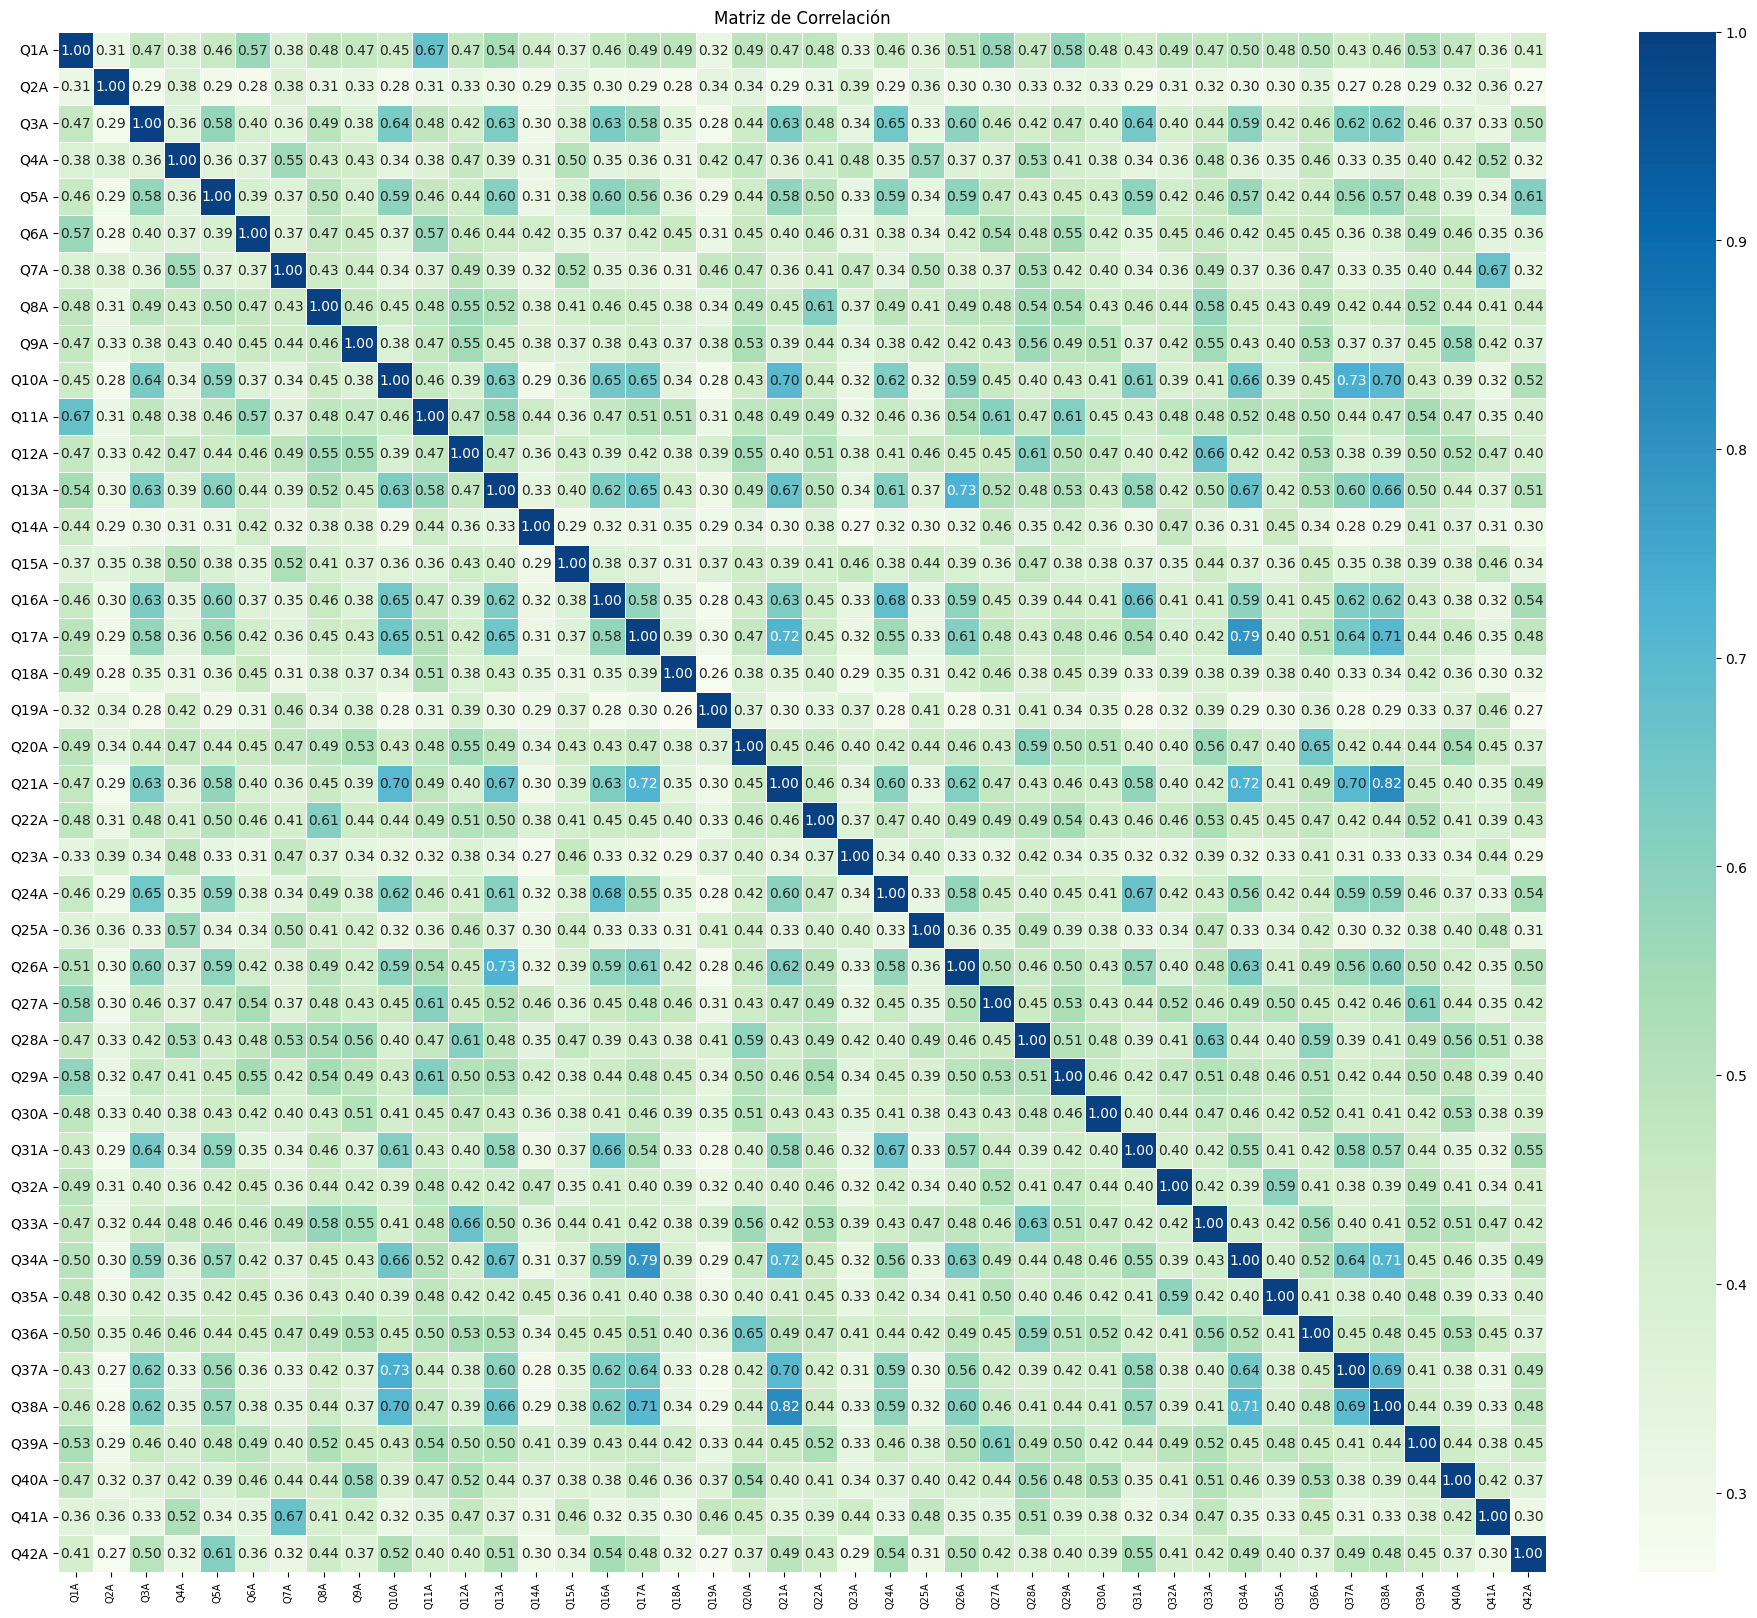

In [16]:
#Matriz de correlación entre las preguntas del test - QA

correlation_matrix = QA.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',cmap='GnBu', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.xticks(fontsize=7)
plt.show()